# Build a Simple Linear Regression

## Context

We have one independent variable (experience years).
We want to predict one dependent variable (salary in thousands of dollars a year)

## Functions

Here, we define 4 functions:
- Predict function: predict a salary from years of experience. (We found the best coefficients B0 et B1 thanks to the cost function and gradient descent).
- Cost function: return the mean squared error 
- Gradient descent: find the best coefficients B0 et B1.
- Print graph: used to display scatter plots of values predicted from the model and real values with matplotlib.


In [2]:
def predict(exp, B0, B1):
    return B0 + B1 * exp

def cost_function(y_pred, y):
    number_pred = len(y_pred)
    error = y_pred - y
    cost = np.sum(error ** 2) / (2 * number_pred)
    return cost

def gradient_descent(exp, salaries, B0, B1, learning_rate, num_iterations):
    num_samples = len(exp)
    for _ in range(num_iterations):
        predictions = predict(exp, B0, B1)
        error = predictions - salaries
        gradient_B0 = np.sum(error) / num_samples
        gradient_B1 = np.sum(error * exp) / num_samples
        B0 -= learning_rate * gradient_B0
        B1 -= learning_rate * gradient_B1
    return B0, B1

def print_graph(exp, salary):
    plt.scatter(exp, salary, label="Real values")
    plt.plot(exp, predict(exp, B0, B1), color='red', label="Linear Regression")
    plt.xlabel("Years of experience")
    plt.ylabel("Salary")
    plt.legend()
    plt.show()

## Train the model

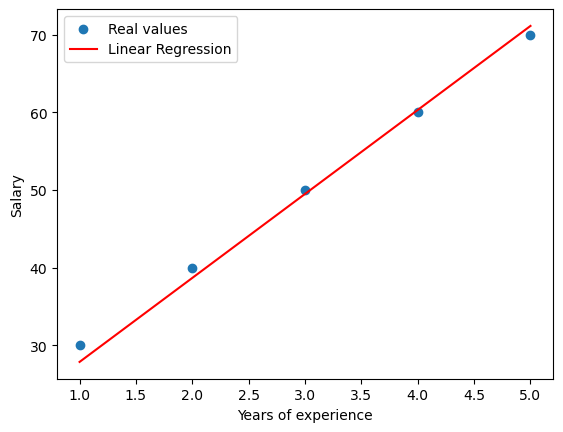

In [3]:
import numpy as np
import matplotlib.pyplot as plt

exp = np.array([1, 2, 3, 4, 5])
salaries = np.array([30, 40, 50, 60, 70])

B0 = 0
B1 = 1
learning_rate = 0.01
num_iterations = 1000

B0, B1 = gradient_descent(exp, salaries, B0, B1, learning_rate, num_iterations)
print_graph(exp, salaries)

## Predict a new value

With our new trained model, we predict a salary from unknown data.
With 30 years of experience, our model predicts a salary of 341k dollars!

In [4]:
new_prediction = predict(30, B0, B1)
print(new_prediction)

341.88837097403075
